In [1]:
#import libaries
import numpy as np
import skimage 
from skimage import io
from skimage import color
from matplotlib import pyplot as plt

In [2]:
# load image
verlauf = io.imread(r'C:\Users\Jerome\Desktop\Code\Einführung\20x20.png')

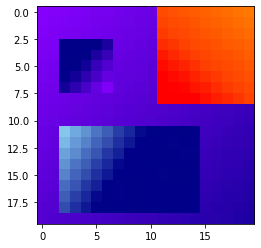

In [3]:
# show image
plt.imshow(verlauf)

In [4]:
# grayscale
gray = color.rgb2gray(verlauf)

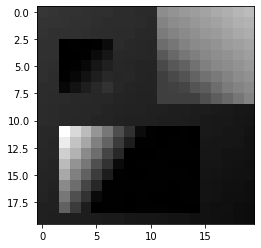

In [5]:
# show grayscale
plt.imshow(gray, cmap = 'gray')

In [6]:
# make image bigger
# show 2d array
print(gray)

[[0.18600667 0.18013569 0.17678745 0.17652745 0.17317922 0.16730824
  0.16759882 0.16172784 0.16035176 0.15531412 0.15477137 0.42291176
  0.44002745 0.45657765 0.46779961 0.48491529 0.50427098 0.51549294
  0.53513137 0.55224706]
 [0.17985294 0.17959294 0.17624471 0.17317922 0.16983098 0.16396
  0.16172784 0.1611851  0.15895294 0.15588745 0.15001647 0.40046784
  0.42038902 0.43132824 0.45096667 0.46779961 0.48182706 0.49894275
  0.51829843 0.52980314]
 [0.17678745 0.17343922 0.17037373 0.17066431 0.16479333 0.16201059
  0.15949569 0.15614745 0.15588745 0.1508498  0.14947373 0.37521843
  0.40046784 0.41477804 0.43161098 0.45124941 0.46218863 0.4821098
  0.49894275 0.51016471]
 [0.17343922 0.17429529 0.03956941 0.04125882 0.03928667 0.04209216
  0.06857255 0.15588745 0.14973373 0.14638549 0.14360275 0.33622431
  0.36119098 0.39513961 0.41477804 0.42571725 0.4425502  0.46247137
  0.47369333 0.49052627]
 [0.17429529 0.16925765 0.03928667 0.03928667 0.04209216 0.06857255
  0.09954784 0.15282

In [7]:
# 20 rows, 20 columns → 20x20 px
print(gray.shape)

(20, 20)


In [8]:
# use upscaling

In [9]:
#neue Größe festlegen
rows = 20
columns = 20
newRows = 2* rows - 1
newColumns = 2* columns - 1
# denn lediglich zwischen Pixeln, damit Interpolation funktioniert

In [10]:
#Feld aus lediglich 0
new = np.zeros((newRows,newColumns))
print(new)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
# 39 rows, 39 columns → 20x20 px
print(new.shape)

(39, 39)


In [12]:
new[0:newRows : 2, 0:newColumns : 2] = gray[0:rows, 0:columns]
# :2 = steps of two
print(new)

[[0.18600667 0.         0.18013569 ... 0.53513137 0.         0.55224706]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.17985294 0.         0.17959294 ... 0.51829843 0.         0.52980314]
 ...
 [0.13049255 0.         0.1299498  ... 0.07610235 0.         0.07331961]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12826039 0.         0.12491216 ... 0.0761251  0.         0.0736102 ]]


In [13]:
# 39 rows, 39 columns → 20x20 px
print(new.shape)

(39, 39)


In [ ]:
new2 = new

In [15]:
# Algortihmus vertikal
n = 2
for newColumns in range(0,39,2):
    for x in range(0,39, 2):
        while x <= 37:
            new2[x+1, newColumns] = (new[x,newColumns] + new[x + n, newColumns]) / 2
            x = x + 2

# Algortihmus horizontal
for newRows in range(0,39,2):
    for y in range(0,39, 2):
        while y <= 37:
            new2[newRows, y+1] = (new[newRows,y] + new[newRows, y + n]) / 2
            y = y + 2

NameError: name 'new2' is not defined

In [16]:
#show new
print(new2)

In [17]:
#algortihmus für leere Stellen
for newColumns in range(0,37, 2):
    for x  in range(0, 37, 2):
        while x <= 37:
            new2[x +1, newColumns + 1] = (new[x, newColumns] + new[x, newColumns + 2] + new[x + 2,newColumns] + new[x +2, newColumns + 2]) / 4
            x = x + 2

In [18]:
#show new
print(new2)

In [19]:
# show old image
plt.imshow(gray, cmap = 'gray')

In [20]:
# show new image
plt.imshow(new2, cmap = 'gray')

In [21]:
# type
print(type(gray))
print(type(new2))

<class 'numpy.ndarray'>


NameError: name 'new2' is not defined

In [22]:
# difference
#np.sum(np.abs(new2 - gray))
# geht nicht, weil kein anfangsbild bekannt

In [33]:
width,height = gray.shape

In [34]:
print(width)

20


In [22]:
def bilineare_interpolation_scale2(img):
    n = 2
    for newColumns in range(0,(len(img[2])-1),2):
        for x in range(0,(len(img[1])-1), 2):
            while x <= (len(img[1])-3):
                new[x+1, newColumns] = (new[x,newColumns] + new[x + n, newColumns]) / 2
                x = x + 2

    # Algortihmus horizontal
    for newRows in range(0,(len(img[1])-1),2):
        for y in range(0,(len(img[2])-1), 2):
            while y <= (len(img[2])-3):
                new[newRows, y+1] = (new[newRows,y] + new[newRows, y + n]) / 2
                y = y + 2
    #algortihmus für leere Stellen
    for newColumns in range(0,(len(img[2])-3), 2):
        for x  in range(0, (len(img[1])-3), 2):
            while x <= (len(img[1])-3):
                new[x +1, newColumns + 1] = (new[x, newColumns] + new[x, newColumns + 2] + new[x + 2,newColumns] + new[x +2, newColumns + 2]) / 4
                x = x + 2
    return new

In [43]:
def bilineare_interpolation(img,scale):
    # bild entpacken (höhe + weite)
    origin_width, origin_height = img.shape
    target_width =int(origin_width * scale)
    target_height =int(origin_height * scale)
    img_padded = np.pad(img, 1, mode = 'edge')
    target_img= np.zeros((target_width,target_height))
    
    for x in range(target_width):
        for y in range(target_height):
            print('x:{},y:{}'.format(x,y))
            x_origin = x/scale
            y_origin = y/scale
            x_min = np.floor(x_origin)
            x_max = np.ceil(x_origin)
            y_min = np.floor(y_origin)
            y_max = np.ceil(y_origin)
            # x_value ermitteln (aus x_min und x_max)
            # y_value
            
            
    
bilineare_interpolation(gray, 2)

x:0,y:0
x:0,y:1
x:0,y:2
x:0,y:3
x:0,y:4
x:0,y:5
x:0,y:6
x:0,y:7
x:0,y:8
x:0,y:9
x:0,y:10
x:0,y:11
x:0,y:12
x:0,y:13
x:0,y:14
x:0,y:15
x:0,y:16
x:0,y:17
x:0,y:18
x:0,y:19
x:0,y:20
x:0,y:21
x:0,y:22
x:0,y:23
x:0,y:24
x:0,y:25
x:0,y:26
x:0,y:27
x:0,y:28
x:0,y:29
x:0,y:30
x:0,y:31
x:0,y:32
x:0,y:33
x:0,y:34
x:0,y:35
x:0,y:36
x:0,y:37
x:0,y:38
x:0,y:39
x:1,y:0
x:1,y:1
x:1,y:2
x:1,y:3
x:1,y:4
x:1,y:5
x:1,y:6
x:1,y:7
x:1,y:8
x:1,y:9
x:1,y:10
x:1,y:11
x:1,y:12
x:1,y:13
x:1,y:14
x:1,y:15
x:1,y:16
x:1,y:17
x:1,y:18
x:1,y:19
x:1,y:20
x:1,y:21
x:1,y:22
x:1,y:23
x:1,y:24
x:1,y:25
x:1,y:26
x:1,y:27
x:1,y:28
x:1,y:29
x:1,y:30
x:1,y:31
x:1,y:32
x:1,y:33
x:1,y:34
x:1,y:35
x:1,y:36
x:1,y:37
x:1,y:38
x:1,y:39
x:2,y:0
x:2,y:1
x:2,y:2
x:2,y:3
x:2,y:4
x:2,y:5
x:2,y:6
x:2,y:7
x:2,y:8
x:2,y:9
x:2,y:10
x:2,y:11
x:2,y:12
x:2,y:13
x:2,y:14
x:2,y:15
x:2,y:16
x:2,y:17
x:2,y:18
x:2,y:19
x:2,y:20
x:2,y:21
x:2,y:22
x:2,y:23
x:2,y:24
x:2,y:25
x:2,y:26
x:2,y:27
x:2,y:28
x:2,y:29
x:2,y:30
x:2,y:31
x:2,y:32
x:2,y:33
x:2,

In [31]:
def upscale (img, scale):
    #To do
    #use scale
    if scale < 1:
        raise Exception("Error: scale parameter must be 1 or more".format(scale))
    rows = len(img[1])
    columns = len(img[2])
    newRows = rows * scale 
    newColumns =columns * scale
    # am rand immer scale - 1 Pixel übrig
    
    new = np.zeros((newRows,newColumns))
    #new = np.zeros(np.size(img2)*scale)
    new[0:newRows : scale, 0:newColumns : scale] = img[0:rows, 0:columns]
    #img2 = np.pad(new,, pad_width [(0,scale - 1),(0,scale - 1)], 'edge')
    #new = np.zeros(np.size(img2)*scale)
    #loop over all pixel
    if scale == 2:
        upscale_bi = bilineare_interpolation_scale2(new, scale)
    else:
        rest = scale % 2
        '''if rest'''
    return upscale_bi

In [28]:
upscaled = upscale(gray,2)

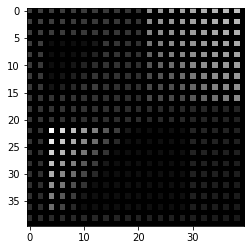

In [29]:
plt.imshow(upscaled, cmap = 'gray')

In [30]:
print(upscaled.shape)

(40, 40)
